In [1]:
import numpy as np
import lichen.lichen as lch
import matplotlib.pyplot as plt

from datetime import datetime,timedelta,date
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from cogent_utilities import sec2days

import sys
#import seaborn as sn

#%matplotlib notebook
%matplotlib inline

In [2]:
#from plotly.widgets import GraphWidget

#from IPython.html import widgets 
#from ipywidgets import widgets
#from IPython.display import display, clear_output
#import plotly

In [33]:
vals = np.loadtxt('data/LE.txt')

seconds = vals[:,0]
org_days = sec2days(seconds)
org_energies = vals[:,1]
org_risetimes = vals[:,2]

elo = 0.5
ehi = 3.3
enbins = 70
ewidth = (ehi-elo)/enbins

dlo = 0.0
dhi = 1240.
dnbins = 62
dwidth = (dhi-dlo)/dnbins

rlo = 0.0
rhi = 5.0
rnbins = 120
rwidth = (rhi-rlo)/rnbins

index = np.ones(len(org_days)).astype(bool)

org_index = index.copy()

print len(org_days[org_energies<ehi])

9318


In [34]:
edata = []
ddata = []
rtdata = []

# Sliding window
ndays = 30
nslices = int(dhi)
tag = "sliding"

for i in range(0,nslices):
    daylo = i
    dayhi = ndays + i

    #print daylo
    #print dayhi

    index = org_days>daylo
    index *= org_days<dayhi
    index *= org_energies>elo
    index *= org_energies<ehi

    days = org_days[index]
    energies = org_energies[index]
    risetimes = org_risetimes[index]

    edata.append(energies)
    ddata.append(days)
    rtdata.append(risetimes)

In [35]:
from ipywidgets import interact

In [48]:

def plot_data(x):
    
    # Sliding window
    
    days = ddata[x]
    energies = edata[x]
    risetimes = rtdata[x]

    fig = plt.figure(figsize=(16,12))
    ax0 = fig.add_subplot(3,1,1)
    ax1 = fig.add_subplot(3,1,2)
    ax2 = fig.add_subplot(3,1,3)

    #plt.plot(energies)
    lch.hist_err(energies,bins=enbins,linewidth=2,range=(elo,ehi),axes=ax0)
    #plt.hist(energies,bins=enbins,range=(elo,ehi))
    #name = "# interactions/ %0.2f keVee" % (ewidth)
    #plt.ylabel(name,fontsize=14)
    #plt.xlabel('Recoil energy (keVee)',fontsize=18)
    plt.ylim(0,25) # This might have to be changed for sliding or discrete
    #plt.xlim(elo,ehi)
    #plt.tight_layout()
    lch.hist_err(days,bins=dnbins,linewidth=2,range=(dlo,dhi),axes=ax1)
    
    lch.hist_err(risetimes,bins=rnbins,linewidth=2,range=(rlo,rhi),axes=ax2)
    ax2.set_ylim(0,25)
    ax2.set_xlim(rlo,rhi)

    
    plt.show()

    return x

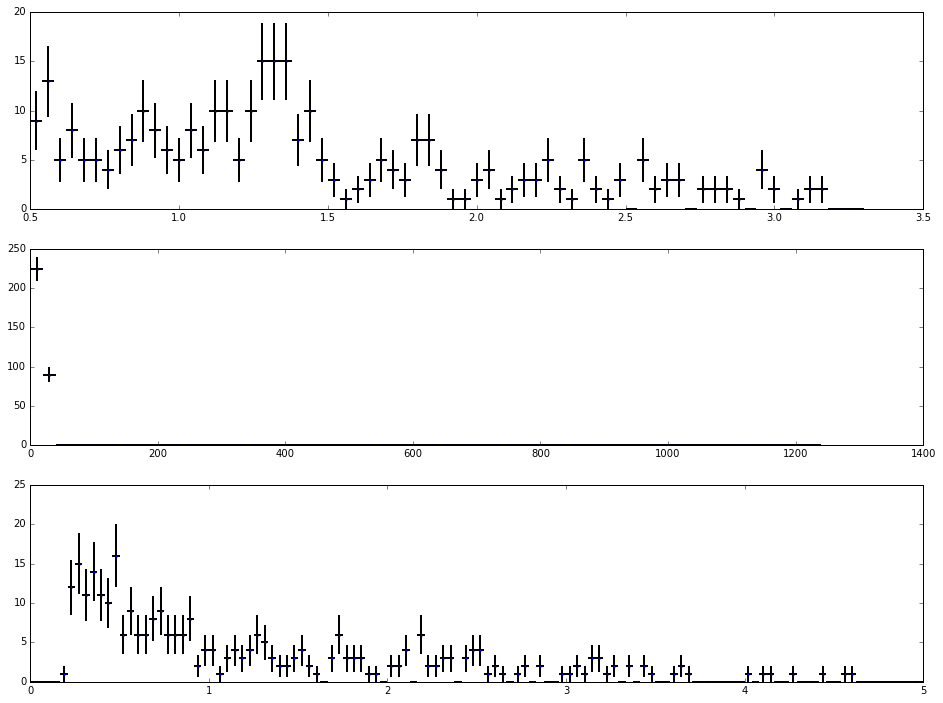

0

In [49]:
interact(plot_data,x=(0,1238,1))

In [42]:
rlo


0.0

In [43]:
rhi

5.0